### Importing the required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Importing the dataset



In [2]:
df = pd.read_csv('vehicle_dataset.csv')

In [3]:
df.head()


,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Micro Panda Auto 2019 for sale,"Posted on 02 Jul 6:27 am, Kesbewa, Colombo","Rs 2,795,000",Micro,Panda,Auto,2019,Used,Automatic,Hatchback,Petrol,"1,000 cc","14,000 km","Kesbewa, Colombo",â¤ Auto Auto Autoâ¤ Micro Panda CBH-xxxx 201...,https://ikman.lk/en/ad/micro-panda-auto-2019-f...,Sarath,Member,2021-07-02 06:27:00
1,Toyota GT86 Company Maintained 2013 for sale,"Posted on 15 Jun 7:38 pm, Rajagiriya, Colombo","Rs 11,500,000",Toyota,GT86,Company Maintained,2013,Used,Automatic,CoupÃ©/Sports,Petrol,"2,000 cc","27,000 km","Rajagiriya, Colombo",Toyota Gt86 Company maintained2013 Manufacture...,https://ikman.lk/en/ad/toyota-gt86-company-mai...,D&D Auto Parts,Premium-Member,2021-06-15 19:38:00
2,"Toyota IST FL , GRADE 2003 for sale","Posted on 05 Jul 1:36 pm, Marawila, Puttalam","Rs 3,300,000",Toyota,IST,"FL , GRADE",2003,Used,Automatic,Hatchback,Petrol,"1,300 cc","150,000 km","Marawila, Puttalam",TOYOTA ISTFL GRADEKD ; >>>> NUMBERYOM 2003RAGE...,https://ikman.lk/en/ad/toyota-ist-fl-grade-200...,Bihan Enterprises,Premium-Member,2021-07-05 13:36:00
3,Toyota Allion 240 2002 for sale,"Posted on 05 Jul 1:33 pm, Peradeniya, Kandy","Rs 4,450,000",Toyota,Allion,240,2002,Used,Automatic,Saloon,Petrol,"1,500 cc","124,000 km","Peradeniya, Kandy",Toyota Allion 240CP KA-4xxxManufactured 2002Re...,https://ikman.lk/en/ad/toyota-allion-240-2002-...,Free Bird Media (Pvt) Ltd,Member,2021-07-05 13:33:00
4,Micro Panda LC 1.0 2015 for sale,"Posted on 05 Jul 1:30 pm, Veyangoda, Gampaha","Rs 2,173,000",Micro,Panda,LC 1.0,2015,Used,Manual,Hatchback,Petrol,"1,000 cc","15,800 km","Veyangoda, Gampaha","CAJ XXXX ,Silver colour ,1st Owner , Full Opti...",https://ikman.lk/en/ad/micro-panda-lc-10-2015-...,Harsha Anuradhi,Member,2021-07-05 13:30:00


### Data Cleaning & Preprocessing

In [4]:
df.dtypes


Title             object
Sub_title         object
Price             object
Brand             object
Model             object
Edition           object
Year               int64
Condition         object
Transmission      object
Body              object
Fuel              object
Capacity          object
Mileage           object
Location          object
Description       object
Post_URL          object
Seller_name       object
Seller_type       object
published_date    object
dtype: object

#### Converting Columns into appropiate data types


In [5]:
def extract_num(row):
    amount = ""
    for w in row:
        if w.isnumeric():
            amount += w
    return int(amount)

df["Price"] = df["Price"].apply(extract_num)
df["Mileage"] = df["Mileage"].apply(extract_num)
df["Capacity"] = df["Capacity"].apply(extract_num)

df = df.rename({"Price":"Price (Rs)", "Mileage":"Mileage (km)", "Capacity": "Capacity (cc)"}, axis=1)


Checking the Null values

In [6]:
df.isnull().sum()

Title                0
Sub_title            0
Price (Rs)           0
Brand                0
Model                0
Edition           4423
Year                 0
Condition            0
Transmission         0
Body              1712
Fuel                 0
Capacity (cc)        0
Mileage (km)         0
Location             0
Description          0
Post_URL             0
Seller_name          0
Seller_type          0
published_date       0
dtype: int64

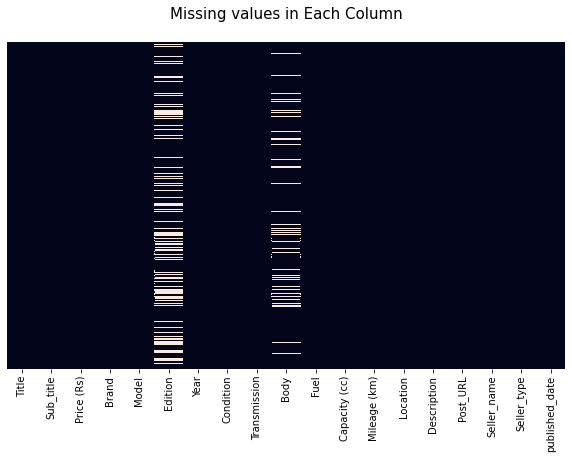

In [7]:
plt.figure(figsize = (10,6))
plt.title("Missing values in Each Column\n", size = 15)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False);

Imputing missing Values 




In [8]:
df['Edition'].fillna(df['Edition'].mode()[0], inplace = True)
df['Body'].fillna(df['Body'].mode()[0], inplace = True)

In [9]:
df.isnull().sum()

Title             0
Sub_title         0
Price (Rs)        0
Brand             0
Model             0
Edition           0
Year              0
Condition         0
Transmission      0
Body              0
Fuel              0
Capacity (cc)     0
Mileage (km)      0
Location          0
Description       0
Post_URL          0
Seller_name       0
Seller_type       0
published_date    0
dtype: int64

In [10]:
df.head()

,Title,Sub_title,Price (Rs),Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity (cc),Mileage (km),Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Micro Panda Auto 2019 for sale,"Posted on 02 Jul 6:27 am, Kesbewa, Colombo",2795000,Micro,Panda,Auto,2019,Used,Automatic,Hatchback,Petrol,1000,14000,"Kesbewa, Colombo",â¤ Auto Auto Autoâ¤ Micro Panda CBH-xxxx 201...,https://ikman.lk/en/ad/micro-panda-auto-2019-f...,Sarath,Member,2021-07-02 06:27:00
1,Toyota GT86 Company Maintained 2013 for sale,"Posted on 15 Jun 7:38 pm, Rajagiriya, Colombo",11500000,Toyota,GT86,Company Maintained,2013,Used,Automatic,CoupÃ©/Sports,Petrol,2000,27000,"Rajagiriya, Colombo",Toyota Gt86 Company maintained2013 Manufacture...,https://ikman.lk/en/ad/toyota-gt86-company-mai...,D&D Auto Parts,Premium-Member,2021-06-15 19:38:00
2,"Toyota IST FL , GRADE 2003 for sale","Posted on 05 Jul 1:36 pm, Marawila, Puttalam",3300000,Toyota,IST,"FL , GRADE",2003,Used,Automatic,Hatchback,Petrol,1300,150000,"Marawila, Puttalam",TOYOTA ISTFL GRADEKD ; >>>> NUMBERYOM 2003RAGE...,https://ikman.lk/en/ad/toyota-ist-fl-grade-200...,Bihan Enterprises,Premium-Member,2021-07-05 13:36:00
3,Toyota Allion 240 2002 for sale,"Posted on 05 Jul 1:33 pm, Peradeniya, Kandy",4450000,Toyota,Allion,240,2002,Used,Automatic,Saloon,Petrol,1500,124000,"Peradeniya, Kandy",Toyota Allion 240CP KA-4xxxManufactured 2002Re...,https://ikman.lk/en/ad/toyota-allion-240-2002-...,Free Bird Media (Pvt) Ltd,Member,2021-07-05 13:33:00
4,Micro Panda LC 1.0 2015 for sale,"Posted on 05 Jul 1:30 pm, Veyangoda, Gampaha",2173000,Micro,Panda,LC 1.0,2015,Used,Manual,Hatchback,Petrol,1000,15800,"Veyangoda, Gampaha","CAJ XXXX ,Silver colour ,1st Owner , Full Opti...",https://ikman.lk/en/ad/micro-panda-lc-10-2015-...,Harsha Anuradhi,Member,2021-07-05 13:30:00


In [11]:
df.dtypes


Title             object
Sub_title         object
Price (Rs)         int64
Brand             object
Model             object
Edition           object
Year               int64
Condition         object
Transmission      object
Body              object
Fuel              object
Capacity (cc)      int64
Mileage (km)       int64
Location          object
Description       object
Post_URL          object
Seller_name       object
Seller_type       object
published_date    object
dtype: object

In [12]:
df.describe()

,Price (Rs),Year,Capacity (cc),Mileage (km)
count,1.630900e+04,16309.000000,16309.000000,16309.000000
mean,6.250761e+06,2008.041388,1496.715188,94578.110062
std,8.316997e+06,11.400445,735.577866,75317.794862
min,9.900000e+02,1927.000000,1.000000,0.000000
25%,2.260000e+06,2003.000000,1000.000000,45000.000000
50%,3.950000e+06,2013.000000,1490.000000,81000.000000
75%,6.690000e+06,2016.000000,1800.000000,127323.000000
max,2.100000e+08,2021.000000,10000.000000,1000000.000000


In [13]:
df['Title'] = df['Brand'] + " "+ df['Model']

In [14]:
df['published_date'] = pd.to_datetime(df['published_date'])

Seperating Year, Month & day for 3 columns

In [15]:
# for year
df['Published_year'] = pd.DatetimeIndex(df['published_date']).year

# for month
df['Published_month'] = pd.DatetimeIndex(df['published_date']).month

# for day
df['Published_day'] = pd.DatetimeIndex(df['published_date']).day

In [16]:
df.columns

Index(['Title', 'Sub_title', 'Price (Rs)', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity (cc)',
       'Mileage (km)', 'Location', 'Description', 'Post_URL', 'Seller_name',
       'Seller_type', 'published_date', 'Published_year', 'Published_month',
       'Published_day'],
      dtype='object')

#### Dropping Unnecessary Features

In [17]:
df.drop(["Sub_title",'Description', 'published_date'], axis = 1, inplace = True)

In [18]:
df.head()

,Title,Price (Rs),Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity (cc),Mileage (km),Location,Post_URL,Seller_name,Seller_type,Published_year,Published_month,Published_day
0,Micro Panda,2795000,Micro,Panda,Auto,2019,Used,Automatic,Hatchback,Petrol,1000,14000,"Kesbewa, Colombo",https://ikman.lk/en/ad/micro-panda-auto-2019-f...,Sarath,Member,2021,7,2
1,Toyota GT86,11500000,Toyota,GT86,Company Maintained,2013,Used,Automatic,CoupÃ©/Sports,Petrol,2000,27000,"Rajagiriya, Colombo",https://ikman.lk/en/ad/toyota-gt86-company-mai...,D&D Auto Parts,Premium-Member,2021,6,15
2,Toyota IST,3300000,Toyota,IST,"FL , GRADE",2003,Used,Automatic,Hatchback,Petrol,1300,150000,"Marawila, Puttalam",https://ikman.lk/en/ad/toyota-ist-fl-grade-200...,Bihan Enterprises,Premium-Member,2021,7,5
3,Toyota Allion,4450000,Toyota,Allion,240,2002,Used,Automatic,Saloon,Petrol,1500,124000,"Peradeniya, Kandy",https://ikman.lk/en/ad/toyota-allion-240-2002-...,Free Bird Media (Pvt) Ltd,Member,2021,7,5
4,Micro Panda,2173000,Micro,Panda,LC 1.0,2015,Used,Manual,Hatchback,Petrol,1000,15800,"Veyangoda, Gampaha",https://ikman.lk/en/ad/micro-panda-lc-10-2015-...,Harsha Anuradhi,Member,2021,7,5


In [19]:
df['Current_year'] = 2022

In [20]:
df['Years_Old'] = df['Current_year'] - df['Published_year']

In [21]:
df.head()

,Title,Price (Rs),Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,...,Mileage (km),Location,Post_URL,Seller_name,Seller_type,Published_year,Published_month,Published_day,Current_year,Years_Old
0,Micro Panda,2795000,Micro,Panda,Auto,2019,Used,Automatic,Hatchback,Petrol,...,14000,"Kesbewa, Colombo",https://ikman.lk/en/ad/micro-panda-auto-2019-f...,Sarath,Member,2021,7,2,2022,1
1,Toyota GT86,11500000,Toyota,GT86,Company Maintained,2013,Used,Automatic,CoupÃ©/Sports,Petrol,...,27000,"Rajagiriya, Colombo",https://ikman.lk/en/ad/toyota-gt86-company-mai...,D&D Auto Parts,Premium-Member,2021,6,15,2022,1
2,Toyota IST,3300000,Toyota,IST,"FL , GRADE",2003,Used,Automatic,Hatchback,Petrol,...,150000,"Marawila, Puttalam",https://ikman.lk/en/ad/toyota-ist-fl-grade-200...,Bihan Enterprises,Premium-Member,2021,7,5,2022,1
3,Toyota Allion,4450000,Toyota,Allion,240,2002,Used,Automatic,Saloon,Petrol,...,124000,"Peradeniya, Kandy",https://ikman.lk/en/ad/toyota-allion-240-2002-...,Free Bird Media (Pvt) Ltd,Member,2021,7,5,2022,1
4,Micro Panda,2173000,Micro,Panda,LC 1.0,2015,Used,Manual,Hatchback,Petrol,...,15800,"Veyangoda, Gampaha",https://ikman.lk/en/ad/micro-panda-lc-10-2015-...,Harsha Anuradhi,Member,2021,7,5,2022,1


In [22]:
df=df.drop(columns=['Title', 'Brand', 'Model', 'Edition', 'Condition', 'Body', 'Location', 'Post_URL', 'Years_Old', 'Seller_name', 'Seller_type', 'Published_year', 'Published_month', 'Published_day', 'Current_year'])

In [23]:
df.head()

,Price (Rs),Year,Transmission,Fuel,Capacity (cc),Mileage (km)
0,2795000,2019,Automatic,Petrol,1000,14000
1,11500000,2013,Automatic,Petrol,2000,27000
2,3300000,2003,Automatic,Petrol,1300,150000
3,4450000,2002,Automatic,Petrol,1500,124000
4,2173000,2015,Manual,Petrol,1000,15800


### Encoding the categorical variables

In [24]:
df.select_dtypes(include='object').columns

Index(['Transmission', 'Fuel'], dtype='object')

In [25]:
# one hot encoding
df = pd.get_dummies(data=df, drop_first=True)

In [26]:
df.head()

,Price (Rs),Year,Capacity (cc),Mileage (km),Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other fuel type,Fuel_Petrol
0,2795000,2019,1000,14000,0,0,0,0,0,0,0,1
1,11500000,2013,2000,27000,0,0,0,0,0,0,0,1
2,3300000,2003,1300,150000,0,0,0,0,0,0,0,1
3,4450000,2002,1500,124000,0,0,0,0,0,0,0,1
4,2173000,2015,1000,15800,1,0,0,0,0,0,0,1


In [27]:
df.shape

(16309, 12)

In [28]:
# matrix of features
x = df.drop(columns='Price (Rs)')

In [29]:
# target variable
y = df['Price (Rs)']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
x_train.shape

(13047, 11)

In [32]:
x_test.shape

(3262, 11)

### Building The Model

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [35]:
y_pred = regressor.predict(x_test)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8155837348605801

### Hyperparameter Tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
parameters = {
    'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
    'criterion':['mse','mae'],
    'max_depth':[10,20,30,40,50],
    'min_samples_split':[2,5,10,20,50],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['auto', 'sqrt', 'log2']
}

In [39]:
random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=parameters, n_iter=10, 
                               scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

In [40]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [41]:
random_cv.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=30, min_samples_split=5,
                      n_estimators=300)

In [42]:
random_cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'mae'}

### Predicting the price

In [43]:
df.head()

,Price (Rs),Year,Capacity (cc),Mileage (km),Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other fuel type,Fuel_Petrol
0,2795000,2019,1000,14000,0,0,0,0,0,0,0,1
1,11500000,2013,2000,27000,0,0,0,0,0,0,0,1
2,3300000,2003,1300,150000,0,0,0,0,0,0,0,1
3,4450000,2002,1500,124000,0,0,0,0,0,0,0,1
4,2173000,2015,1000,15800,1,0,0,0,0,0,0,1


In [67]:
single_pred = [[2015,500,10000,0,1,0,0,0,0,0,1]]

In [68]:
regressor.predict(single_pred)

array([3974628.33333333])